In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# 타이타닉 데이터셋 로드
df = pd.read_csv('passengers.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# 성별에 따라 female 은 1, male 은 0 으로 나눈다
df['Sex'] = df['Sex'].apply(lambda sex : 1 if sex =='female' else 0 )
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [48]:
mean_age = np.mean(df['Age'])
print('mean_age: ' + str(mean_age))
# Age 값이 NaN 인 row를 다 mean_age 로 채워준다
df['Age'].fillna(value=mean_age, inplace=True)

mean_age: 29.69911764705882


In [51]:
# 퍼스트 클래스 column을 생성한 뒤 Pclass가 1 이면 1, 아니면 0을 할당한다
df['FirstClass'] = df['Pclass'].apply(lambda val: 1 if val == 1 else 0)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [52]:
# 세컨드 클래스 column을 생성한 뒤 Pclass가 2 이면 1, 아니면 0을 할당한다
df['SecondClass'] = df['Pclass'].apply(lambda val: 1 if val == 2 else 0)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [53]:
# feature와 Lable을 분리한다
features = df[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = df['Survived']

In [62]:
# train, test 셋을 분리한다
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, survival, test_size = 0.3)

In [63]:
# feature를 정규화할 Scaler를 import 한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:
# LogisticRegression 모델 생성 및 훈련 데이터 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# train score 측정
model.score(x_train_scaled, y_train)

0.7961476725521669

In [68]:
# test score 측정
model.score(x_test_scaled, y_test)

0.7574626865671642

[[ 1.28470924 -0.44860672  1.06803977  0.42108332]]
[-0.5598922]


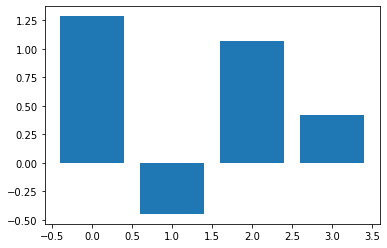

In [73]:
# model이 coef 와 intercept를 확인
print(model.coef_)
print(model.intercept_)
plt.bar(range(len(model.coef_[0])), model.coef_[0])
plt.show()

In [76]:
# 임의의 샘플 데이터를 만든다
Jack = [0, 29, 0, 1]
Rose = [1, 45, 1, 0]
You = [0, 23, 0, 0]
sample_passengers = np.array([Jack, Rose, You])
print(sample_passengers)

[[ 0 29  0  1]
 [ 1 45  1  0]
 [ 0 23  0  0]]


In [77]:
# 스케일링
sample_passengers = scaler.transform(sample_passengers)
print(sample_passengers)

[[-3.14495019e-02  2.89509937e+01 -1.84123477e-02  1.09989059e+00]
 [ 9.59376103e-01  4.49380056e+01  9.70751796e-01  5.64969532e-02]
 [-3.14495019e-02  2.29558642e+01 -1.84123477e-02  5.64969532e-02]]


In [79]:
result = model.predict(sample_passengers)
prob = model.predict_proba(sample_passengers)
print(result)
print(prob)

[0 0 0]
[[9.99998044e-01 1.95635517e-06]
 [9.99999990e-01 9.94423730e-09]
 [9.99981437e-01 1.85629233e-05]]
